In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import pearsonr

In [3]:
df = pd.read_csv('data/Grains/seeds.csv', names=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
df.head()

,A,B,C,D,E,F,G,H
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df.isna().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
dtype: int64

In [5]:
df.H.value_counts()

1    70
2    70
3    70
Name: H, dtype: int64

In [6]:
samples = df.drop('H', axis=1)
samples = np.array(samples)
samples

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [7]:
targets = df['H']
targets = np.array(targets)
targets

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)
kmeans.inertia_

587.3186115940429

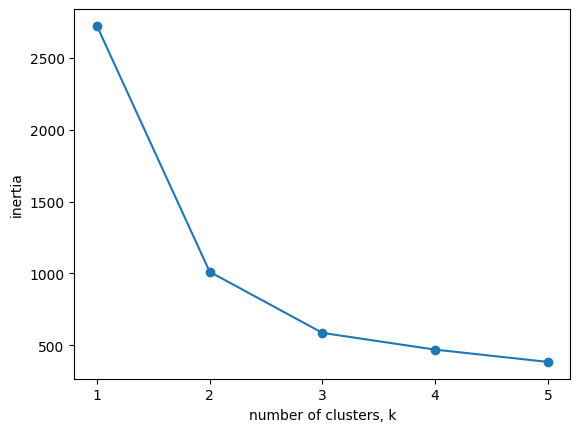

In [9]:
ks = range(1, 6)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(samples)
    inertias.append(kmeans.inertia_)
    
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

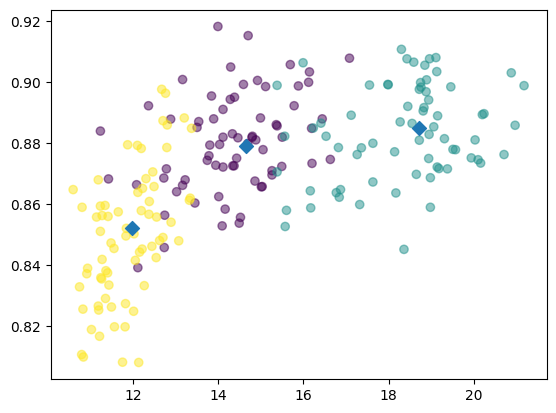

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(samples)

xs = samples[:, 0]
ys = samples[:, 2]

plt.scatter(xs, ys, c=targets, alpha=0.5)

centroids = kmeans.cluster_centers_

centroids_x = centroids[:, 0]
centroids_y = centroids[:, 2]

plt.scatter(centroids_x, centroids_y, marker='D', s=50)

plt.show()

### Heirarchical Clustering

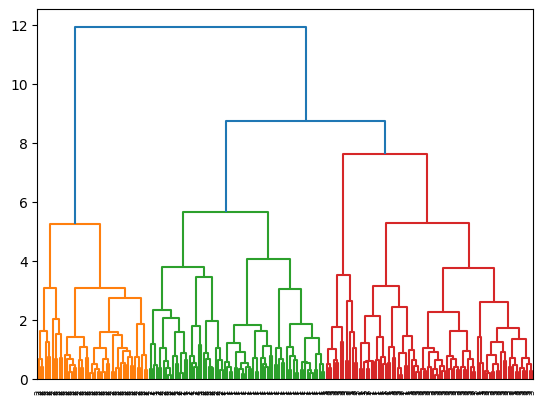

In [11]:
mergings = linkage(samples, method='complete')

dendrogram(mergings,
           labels=targets,
           leaf_rotation=90,
           leaf_font_size=6)

plt.show()

In [16]:
labels = fcluster(mergings, 8, criterion='distance')
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2,
       2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### TSNE

C:\Users\USER\Documents\projects\data\internship\task\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


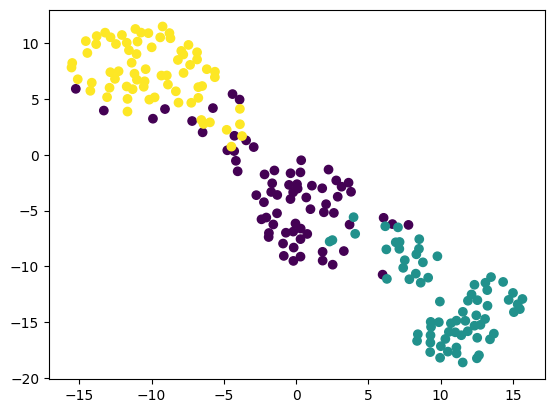

In [18]:
tsne = TSNE(learning_rate=200)
transformed = tsne.fit_transform(samples)

xs = transformed[:, 0]
ys = transformed[:, 1]

plt.scatter(xs, ys, c=targets)
plt.show()

### PCA

In [21]:
data = np.array(df[['E', 'D']])
data

array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658],
       [3.312, 5.386],
       [3.259, 5.563],
       [3.302, 5.42 ],
       [3.465, 6.053],
       [3.505, 5.884],
       [3.242, 5.714],
       [3.201, 5.438],
       [3.199, 5.439],
       [3.156, 5.479],
       [3.114, 5.482],
       [3.333, 5.351],
       [3.383, 5.119],
       [3.514, 5.527],
       [3.466, 5.205],
       [3.049, 5.226],
       [3.129, 5.658],
       [3.168, 5.52 ],
       [3.507, 5.618],
       [2.936, 5.099],
       [3.245, 5.789],
       [3.421, 5.833],
       [3.026, 5.395],
       [2.956, 5.395],
       [3.221, 5.541],
       [3.065, 5.516],
       [2.975, 5.454],
       [3.371, 5.757],
       [3.186, 5.717],
       [3.15 , 5.585],
       [3.328, 5.712],
       [3.485, 5.709],
       [3.464, 5.826],
       [3.683, 5.832],
       [3.288, 5.656],
       [3.298, 5.397],
       [3.156, 5.348],
       [3.158, 5.351],
       [3.201, 5.138],
       [3.3

In [24]:
width = data[:,0]
length = data[:,1]

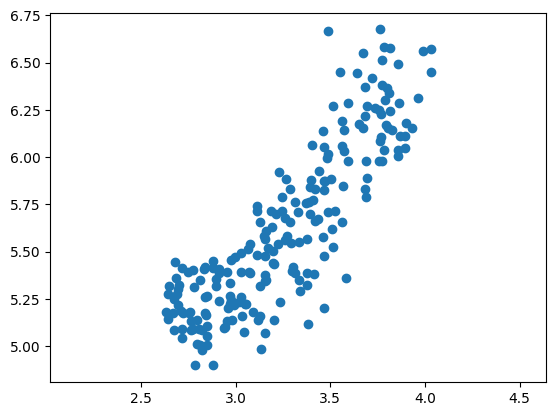

In [25]:
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [26]:
correlation, pvalue = pearsonr(width, length)
print(correlation)
print(pvalue)

0.8604149377143466
8.121332906193694e-63


In [27]:
pca = PCA()
transformed = pca.fit_transform(data)

xs = transformed[:,0]
ys = transformed[:,1]

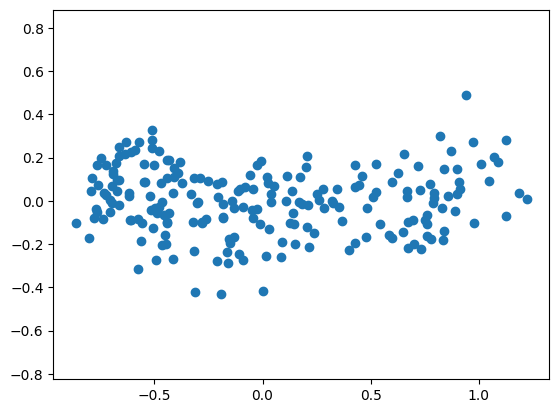

In [29]:
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [30]:
correlation, pvalue = pearsonr(xs, ys)
print(correlation)
print(pvalue)

-5.204170427930421e-18
0.999999999999971


### Intrinsic Dimension (First Principal Component)

In [31]:
pca = PCA()
pca.fit(data)

PCA()

In [32]:
mean = pca.mean_
first_pc = pca.components_[0,:]

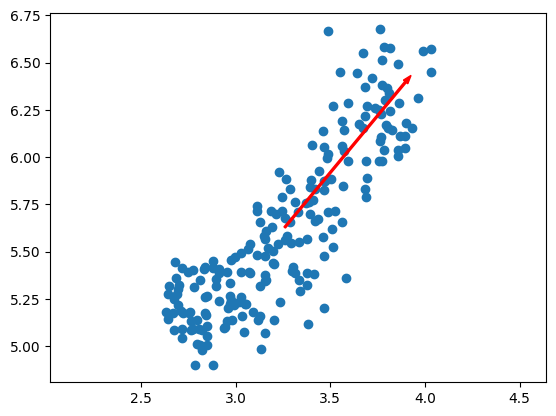

In [34]:
plt.scatter(data[:,0], data[:,1])
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.axis('equal')
plt.show()